In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

**FVM Coupled - Steady State 1D - The source term is the only coupling!**

$$ \alpha \frac{d^2T}{dx^2} - Q(C) =0 \,\, \forall x \in [0,1]$$ 
$$  \beta \frac{d^2C}{dx^2} - S(T) = 0 \,\, \forall x \in [0,1] $$

Consider typical values of $T$ to be 300K to thousands range. 
Consider typical values of $C$ to be 0 to 10 or so. 

Decide constants $c_1$ and $c_2$ appropriately.

$$ S(T) = c_1 (- 1 - 1|\sin(\frac{T}{10})|) $$
$$ Q(C) = c_2 (- 10|\cos(C)|) $$


*Two Robin Boundary conditions for T* (Ambient Temperature can be 300)
$$\frac{dT}{dx}|_{x=0} =-h_c(T(x) - T_a); \frac{dT}{dx}|_{x=1} = h_c (T(x) - T_a) $$

*Two Dirichlet Boundary conditions for C*
$$C(x=0) = 0; C(x=1) = 2$$

In [2]:
c_1 = 0.5 
c_2 = 10

h_c = 0.05
T_a = 300

alpha = 0.01
beta = 0.01

C_left = 0
C_right = 2


def S(T):
    return c_1*(-np.abs(np.sin(T)))

def Q(C):
    return c_2*(-1 + -1*np.abs(np.cos(C)))

**Left Robin FVM Derivation** (part of the content is on another file from Work_PC branch) - Implementation leads to entirely different results at different mesh sizes- not even shapewise similar

Important: For the left end cell, there should be a negative sign! (I think) $\frac{dT}{dx} = - h(T_{left} - T_a) $

Eq.(2) basically implies

$$f'(x_0) = \frac{f(x_0) - f(x_0 - h)}{h}$$

For the cell at left end, 
$$ \frac{dT}{dx}|_w = \frac{T_1 - T_{left}}{\frac{\Delta x}{2}} $$


The above equation leads to 

$$ \implies -h_c(T_{left} - T_a) = \frac{T_1 - T_{left}}{\frac{\Delta x}{2}}  $$

$$ T_{left} (\frac{2}{\Delta x} - h) = -h_cT_a + \frac{2T_1}{\Delta x}$$

$$ \implies T_{left} = \frac{(-h_cT_a + \frac{2T_1}{\Delta x})}{(\frac{2}{\Delta x} - h_c)}

Further, From Eq.(1)

$$ k(\frac{dT}{dx}|_e - (-h_c(T_{left} - T_a)) ) - Q \Delta x = 0$$

$$\frac{dT}{dx}|_e  = \frac{T_2 - T_1}{2h}$$

Considering $h = \frac{\Delta x}{2}$,

$$ k(\frac{T_2 - T_1}{\Delta x} + h_c(T_{left} - T_a) ) - Q \Delta x = 0$$

$$ T_1 = T_2 + h_c(T_{left} - T_a) \Delta x - \frac{Q (\Delta x)^2}{k}$$

In [3]:
T_left = T_a
n = 2000 #Number of cells

# T = 100*np.ones((n+2,),dtype='double') #Temperature of the cells; 2 additional cells for the two robin boundary conditions
T = 100*np.ones((n+1,),dtype='double')
C = np.ones((n,),dtype='double')
 
del_x = 1/n #Length of each cell



In [4]:
iters = 0
eps_T = 50 #initializing eps to a large value
eps_C = 50 #initializing eps to a large value
tol_T = 1e-4
tol_C = 1e-5

while (eps_T > tol_T or eps_C > tol_C):

    #T_update
    T_old = T.copy()

    T[0] = (T[1] + 2*T_left - Q(C[0])*(del_x**2)/ alpha) / 3
    T[n-1] = h_c*(T[n] - T_a)*del_x + T[n-2] - (Q(C[n-1])/alpha)* (del_x**2)

    T[n] = (h_c*T_a - 2*T[n-1]/del_x)/(h_c - 2/del_x)
    T[1:n-1] = (T[0:n-2] + T[2:n])/2 - Q(C[1:n-1])*(del_x**2)/(2*alpha)


    
    # T[1] = T[2] + h_c*(T[0] - T_a)*del_x - Q(C[0])*(del_x**2)/ alpha
    # T[0] = (2*T[1]/del_x - h_c*T_a)/(2/del_x - h_c) #T[0] is calculated using the left robin boundary condition
    
    # T[n] = h_c*(T[n+1] - T_a)*del_x + T[n-1] - (Q(C[n-1])/alpha)* (del_x**2) #T[n+1] is calculated using the right robin boundary condition
    # T[n+1] = (h_c*T_a - 2*T[n]/del_x)/(h_c - 2/del_x)

    # T[2:n] = (T[1:n-1] + T[3:n+1])/2 - Q(C[1:n-1])*(del_x**2)/(2*alpha) #This is all the central cells

    #C_update
    C_old = C.copy()

    C[0] = (C[1] + 2*C_left - S(T[0])*(del_x**2)/beta)/3
    C[n-1] = (2*C_right + C[n-2] - S(T[n-1])*(del_x**2)/beta)/3
    C[1:n-1] = (C[2:n] + C[0:n-2])/2 - S(T[1:n-1])*(del_x**2)/(2*beta) 

    # C[0] = (C[1] + 2*C_left - S(T[1])*(del_x**2)/beta)/3
    # C[n-1] = (2*C_right + C[n-2] - S(T[n])*(del_x**2)/beta)/3
    # C[1:n-1] = (C[2:n] + C[0:n-2])/2 - S(T[2:n])*(del_x**2)/(2*beta) 


    # T_new = T.copy()
    eps_T = np.max(np.abs(T_old - T))
    eps_C = np.max(np.abs(C_old - C))
    # print(eps)

    iters += 1

In [5]:
print(iters)
print(eps_T)
print(eps_C)

3565658
9.999996416354406e-05
5.516917251924269e-07


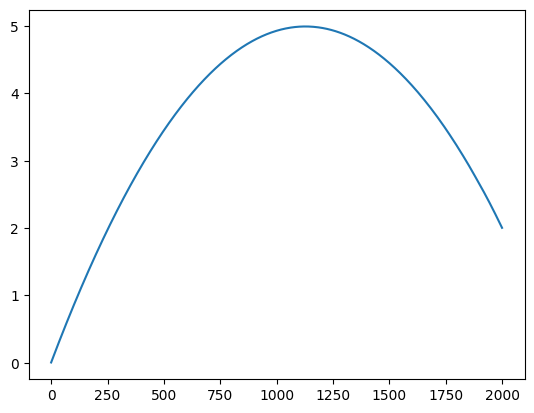

In [6]:
plt.plot(C)

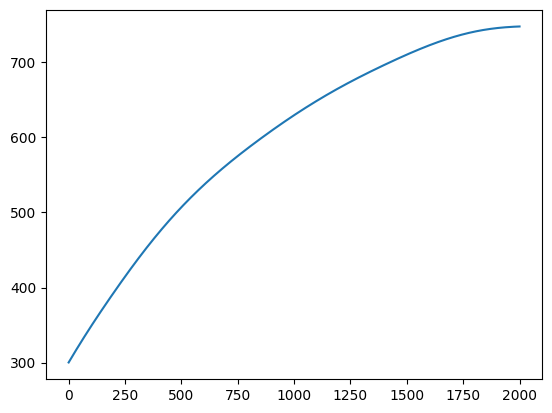

In [7]:
plt.plot(T)
# plt.plot(C)